<hr style="border-width:2px;border-color:#BF3FAE">
<h1 style = "text-align:center"> AUTO INSURANCE</h1> 
<hr style="border-width:2px;border-color:#BF3FAE">

#### Objective :



The aim of this notebook is to predict the target "TARGET_FLAG" which is a binary value.

In [404]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
pd.set_option('display.max_columns', None)


<hr style="border-width:2px;border-color:#BF3FAE">
<h3 style = "text-align:center"> 1. Data input</h3> 
<hr style="border-width:2px;border-color:#BF3FAE">

The dataset it's about auto insurance which is available on kaggle via the link https://www.kaggle.com/c/auto-insurance-fall-2017/data

In [405]:
# read data

In [406]:
train_df = pd.read_csv('train_auto.csv')
test_df = pd.read_csv('test_auto.csv')

In [407]:
train_df.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.0,"$67,349",No,$0,z_No,M,PhD,Professional,14,Private,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.0,0,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,z_High School,z_Blue Collar,22,Commercial,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0.0,0,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,z_High School,Clerical,5,Private,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
3,5,0,0.0,0,51.0,0,14.0,NaN,No,"$306,251",Yes,M,<High School,z_Blue Collar,32,Private,"$15,440",7,Minivan,yes,$0,0,No,0,6.0,Highly Urban/ Urban
4,6,0,0.0,0,50.0,0,NaN,"$114,986",No,"$243,925",Yes,z_F,PhD,Doctor,36,Private,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,17.0,Highly Urban/ Urban


In [408]:
train_df.columns

Index(['INDEX', 'TARGET_FLAG', 'TARGET_AMT', 'KIDSDRIV', 'AGE', 'HOMEKIDS',
       'YOJ', 'INCOME', 'PARENT1', 'HOME_VAL', 'MSTATUS', 'SEX', 'EDUCATION',
       'JOB', 'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR',
       'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CAR_AGE', 'URBANICITY'],
      dtype='object')

<hr style="border-width:2px;border-color:#BF3FAE">
<h4 style = "text-align:center"> 1.1. Dataset analysis / exploration </h4> 
<hr style="border-width:2px;border-color:#BF3FAE">

In [409]:
# Make a dataset exploration and visualisations

In [410]:
# drop index and target_amt feature
train_df.drop('INDEX',axis=1, inplace=True)
train_df.drop('TARGET_AMT',axis=1, inplace=True)
test_df.drop('TARGET_AMT',axis=1, inplace=True)

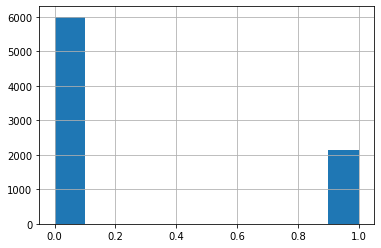

In [411]:
# visualizing the target attribute
train_df.TARGET_FLAG.hist()

TARGET_FLAG: 0 or 1 ==> we have a supervised binary classification problem\\

our Target attribute is not equally distributed we have more data for the target_flag equal 0

In [412]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8161 entries, 0 to 8160
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TARGET_FLAG  8161 non-null   int64  
 1   KIDSDRIV     8161 non-null   int64  
 2   AGE          8155 non-null   float64
 3   HOMEKIDS     8161 non-null   int64  
 4   YOJ          7707 non-null   float64
 5   INCOME       7716 non-null   object 
 6   PARENT1      8161 non-null   object 
 7   HOME_VAL     7697 non-null   object 
 8   MSTATUS      8161 non-null   object 
 9   SEX          8161 non-null   object 
 10  EDUCATION    8161 non-null   object 
 11  JOB          7635 non-null   object 
 12  TRAVTIME     8161 non-null   int64  
 13  CAR_USE      8161 non-null   object 
 14  BLUEBOOK     8161 non-null   object 
 15  TIF          8161 non-null   int64  
 16  CAR_TYPE     8161 non-null   object 
 17  RED_CAR      8161 non-null   object 
 18  OLDCLAIM     8161 non-null   object 
 19  CLM_FR

In [413]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2141 entries, 0 to 2140
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INDEX        2141 non-null   int64  
 1   TARGET_FLAG  0 non-null      float64
 2   KIDSDRIV     2141 non-null   int64  
 3   AGE          2140 non-null   float64
 4   HOMEKIDS     2141 non-null   int64  
 5   YOJ          2047 non-null   float64
 6   INCOME       2016 non-null   object 
 7   PARENT1      2141 non-null   object 
 8   HOME_VAL     2030 non-null   object 
 9   MSTATUS      2141 non-null   object 
 10  SEX          2141 non-null   object 
 11  EDUCATION    2141 non-null   object 
 12  JOB          2002 non-null   object 
 13  TRAVTIME     2141 non-null   int64  
 14  CAR_USE      2141 non-null   object 
 15  BLUEBOOK     2141 non-null   object 
 16  TIF          2141 non-null   int64  
 17  CAR_TYPE     2141 non-null   object 
 18  RED_CAR      2141 non-null   object 
 19  OLDCLA

We can see that some of the columns in train and test data contains missing values: AGE, YOJ, INCOME, HOME_VAL, JOB, CAR_AGE\\

In our data we have two types of attributes:

<li> Categorical attributes that needs to be mapped to numerical values : PARENT1, MSTATUS, SEX, EDUCATION, JOB, CAR_USE, CAR_TYPE, RED_CAR, REVOKED, URBANICITY
    
<li> Numerical attributes: 'KIDSDRIV', 'AGE', 'HOMEKIDS','YOJ', 'INCOME', 'HOME_VAL', 'TRAVTIME', 'BLUEBOOK', 'TIF', 'OLDCLAIM', 'CLM_FREQ','MVR_PTS', 'CAR_AGE'
    
Next step is about fill the missing values and encode the categorical values.

#### Missing values:

number of missing values for the AGE column6


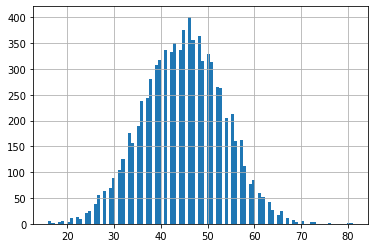

In [414]:
#AGE
print(f"number of missing values for the AGE column{len(train_df[train_df.AGE.isna()])}")
train_df.AGE.hist(bins=100);

In [415]:
mu, std = norm.fit(train_df.AGE.dropna().to_numpy())
mu, std

(44.79031269160024, 8.62706046405591)

From the figure we notice that the distribution of the age column looks like a normal distribution. so the idea for the missing value is to fit the data with a normal distribution and fill the missing values by sampling. 

In [416]:
# Fit a normal distribution to the data:
mu, std = norm.fit(train_df.AGE.dropna().to_numpy())
# fill the missing value for the age column by randomly sample from a normal distribution
train_idx = train_df[train_df.AGE.isna()].index
test_idx = test_df[test_df.AGE.isna()].index

for ix in train_idx:
    train_df.at[ix,'AGE'] = np.random.normal(mu, std, 1)
for ix in test_idx:
    test_df.at[ix,'AGE'] = np.random.normal(mu, std, 1)

In [417]:
#YOJ
train_df.YOJ.unique()

array([11., 10., 14., nan, 12.,  7.,  5.,  0., 13.,  9., 17.,  8., 15.,
       16.,  6., 18., 23.,  3.,  4.,  2., 19.,  1.])

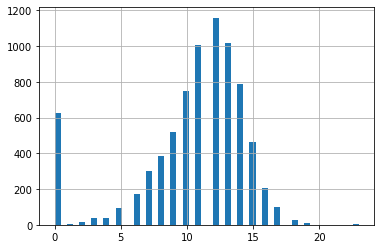

In [418]:
train_df.YOJ.hist(bins=50)

In [419]:
print(f"number of missing value for YOJ is {len(train_df[train_df.YOJ.isna()])}")

number of missing value for YOJ is 454


In this case i'll fill the missing  value with the mean

In [420]:
mean = train_df["YOJ"].mean() # compute the mean value
train_df["YOJ"].fillna(mean, inplace=True)
test_df["YOJ"].fillna(mean, inplace=True)

In [421]:
# INCOME
def convert_float(x):
    try: 
        return float(x.replace(',','.')[1:])
    except:
        return x
                     
train_df.INCOME = train_df.INCOME.apply(lambda x: convert_float(x)) # convert the income string to float
test_df.INCOME = test_df.INCOME.apply(lambda x: convert_float(x)) # convert the income string to float


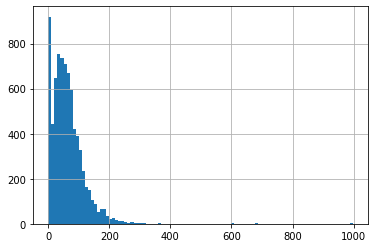

In [422]:
train_df.INCOME.hist(bins=100)

in this case we have a dominant value which is 0, so i'll fill the missing data with 0

In [423]:
train_df.INCOME.fillna(0,inplace=True)
test_df.INCOME.fillna(0,inplace=True)

In [424]:
# HOME_VAL
train_df.HOME_VAL = train_df.HOME_VAL.apply(lambda x: convert_float(x)) # convert the income string to float
test_df.HOME_VAL = test_df.HOME_VAL.apply(lambda x: convert_float(x)) # convert the income string to float


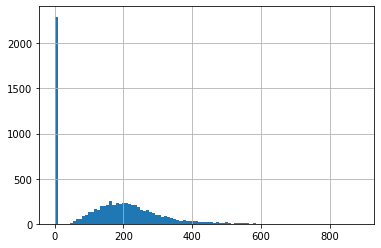

In [425]:
train_df.HOME_VAL.hist(bins=100)

we have a dominant value which is 0, i'll fill the missing values with 0

In [426]:
train_df.HOME_VAL.fillna(0,inplace=True)
test_df.HOME_VAL.fillna(0,inplace=True)

In [427]:
# JOB
train_df.JOB.value_counts()

z_Blue Collar    1825
Clerical         1271
Professional     1117
Manager           988
Lawyer            835
Student           712
Home Maker        641
Doctor            246
Name: JOB, dtype: int64

In [428]:
len(train_df[train_df.JOB.isna()])

526

in this case it's better to distinguish the missing values by adding another category for the missing values.

In [429]:
train_df.JOB.fillna('NA', inplace=True)
test_df.JOB.fillna('NA', inplace=True)

In [430]:
# CAR_AGE

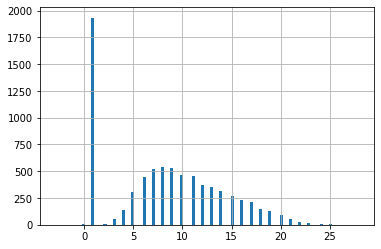

In [431]:
train_df.CAR_AGE.hist(bins=100)

We have a dominant value, so we fill the misiing value by 1

In [432]:
train_df.CAR_AGE.fillna(1,inplace=True)
test_df.CAR_AGE.fillna(1,inplace=True)

#### Encoding the categorical values:

The two most popular techniques:
<li> Integer encoding: each unique label mapped to an integer, it is mainly used if we have a known relationship between the labels
<li> One hot encoding: each unique label mapped to a binary vector, it is mainly used if there is no relationship between the labels

In [433]:
# PARENT1
train_df.PARENT1.unique()

array(['No', 'Yes'], dtype=object)

For the column PARENT1 has two unique value, the best encoding method is a binary encoding:

NO ==> 0 <br>
YES ==> 1

In [434]:
train_df['PARENT1'] = train_df['PARENT1'].apply(lambda x: 0 if x=='No' else 1)
test_df['PARENT1'] = test_df['PARENT1'].apply(lambda x: 0 if x=='No' else 1)

In [435]:
# MSTATUS
train_df.MSTATUS.unique()

array(['z_No', 'Yes'], dtype=object)

binary encoding<br>
z_NO ==> 0<br>
Yes ==> 1

In [436]:
train_df['MSTATUS'] = train_df['MSTATUS'].apply(lambda x: 0 if x=='z_No' else 1)
test_df['MSTATUS'] = test_df['MSTATUS'].apply(lambda x: 0 if x=='z_No' else 1)

In [437]:
#SEX
train_df.SEX.unique()

array(['M', 'z_F'], dtype=object)

binary encoding: <br>
z_F ==> 0<br>
M ==> 1

In [438]:
train_df['SEX'] = train_df['SEX'].apply(lambda x: 0 if x=='z_F' else 1)
test_df['SEX'] = test_df['SEX'].apply(lambda x: 0 if x=='z_F' else 1)

In [439]:
#EDUCATION
train_df.EDUCATION.unique()

array(['PhD', 'z_High School', '<High School', 'Bachelors', 'Masters'],
      dtype=object)

In this case there is relashionship between the category so it's good to use the method integer encoding:<br>
"<High School" ==> 0
"z_High School" ==> 1
"Bachelors" ==> 2
"Masters" ==> 3
"phd" ==> 4

In [440]:
def encode_education(x):
    if x=="<High School":
        return 0
    elif x=='z_High School':
        return 1
    elif x=='Bachelors':
        return 2
    elif x=='Masters':
        return 3
    elif x=='PhD':
        return 4
train_df["EDUCATION"] = train_df["EDUCATION"].apply(lambda x: encode_education(x))
test_df["EDUCATION"] = test_df["EDUCATION"].apply(lambda x: encode_education(x))

In [441]:
#CAR USE
train_df.CAR_USE.unique()

array(['Private', 'Commercial'], dtype=object)

In [442]:
train_df['CAR_USE'] = train_df['CAR_USE'].apply(lambda x: 0 if x=='Private' else 1)
test_df['CAR_USE'] = test_df['CAR_USE'].apply(lambda x: 0 if x=='Private' else 1)

In [443]:
# CAR_TYPE
train_df['CAR_TYPE'].unique()

array(['Minivan', 'z_SUV', 'Sports Car', 'Van', 'Panel Truck', 'Pickup'],
      dtype=object)

in this we don't have a relationship between category, so we will use the one hot encoding method 

In [444]:
ohe = OneHotEncoder()
ohe.fit(train_df[['CAR_TYPE']]) # fit the one hot encoding on the training data
CARE_TYPE_COLUMNS = train_df['CAR_TYPE'].unique().tolist()
train_df = train_df.join(pd.DataFrame(ohe.transform(train_df[['CAR_TYPE']]).todense(),columns=CARE_TYPE_COLUMNS))
test_df = test_df.join(pd.DataFrame(ohe.transform(test_df[['CAR_TYPE']]).todense(),columns=CARE_TYPE_COLUMNS))
test_df.drop('CAR_TYPE',axis=1,inplace=True)
train_df.drop('CAR_TYPE',axis=1,inplace=True)

In [445]:
# RED_CAR
train_df.RED_CAR.unique()

array(['yes', 'no'], dtype=object)

Binary encoding

In [446]:
train_df["RED_CAR"] = train_df["RED_CAR"].apply(lambda x: 0 if x=='no' else 1)
test_df["RED_CAR"] = test_df["RED_CAR"].apply(lambda x: 0 if x=='no' else 1)

In [447]:
#REVOKED
train_df.REVOKED.unique()

array(['No', 'Yes'], dtype=object)

In [448]:
#binary encoding
train_df["REVOKED"] = train_df["REVOKED"].apply(lambda x: 0 if x=='No' else 1)
test_df["REVOKED"] = test_df["REVOKED"].apply(lambda x: 0 if x=='No' else 1)

In [449]:
# URBANICITY
train_df.URBANICITY.unique()

array(['Highly Urban/ Urban', 'z_Highly Rural/ Rural'], dtype=object)

In [450]:
#binary encoding
train_df["URBANICITY"] = train_df["URBANICITY"].apply(lambda x: 0 if x=='Highly Urban/ Urban' else 1)
test_df["URBANICITY"] = test_df["URBANICITY"].apply(lambda x: 0 if x=='Highly Urban/ Urban' else 1)

In [451]:
# JOB
train_df.JOB.unique()

array(['Professional', 'z_Blue Collar', 'Clerical', 'Doctor', 'Lawyer',
       'Manager', 'NA', 'Home Maker', 'Student'], dtype=object)

In [452]:
#one hot encoding
ohe = OneHotEncoder()
ohe.fit(train_df[['JOB']]) # fit the one hot encoding on the training data
JOB_COLUMNS = train_df['JOB'].unique().tolist()
train_df = train_df.join(pd.DataFrame(ohe.transform(train_df[['JOB']]).todense(),columns=JOB_COLUMNS))
test_df = test_df.join(pd.DataFrame(ohe.transform(test_df[['JOB']]).todense(),columns=JOB_COLUMNS))
test_df.drop('JOB',axis=1,inplace=True)
train_df.drop('JOB',axis=1,inplace=True)

In [488]:
test_df.head()

,INDEX,TARGET_FLAG,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY,Minivan,z_SUV,Sports Car,Van,Panel Truck,Pickup,Professional,z_Blue Collar,Clerical,Doctor,Lawyer,Manager,NA,Home Maker,Student
0,3,NaN,0,48.0,0,11.000000,52.881,0,0.0,0,1,2,26,0,21.97,1,1,0.000,0,0,2,10.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,9,NaN,1,40.0,1,11.000000,50.815,1,0.0,0,1,1,21,0,18.93,6,0,3.295,1,0,2,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,10,NaN,0,44.0,2,12.000000,43.486,1,0.0,0,0,1,30,1,5.90,10,0,0.000,0,0,0,10.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,18,NaN,0,35.0,2,10.499286,21.204,1,0.0,0,1,1,74,0,9.23,6,0,0.000,0,1,0,4.0,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,21,NaN,0,59.0,0,12.000000,87.460,0,0.0,0,1,1,45,0,15.42,1,1,44.857,2,0,4,1.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [454]:
# change the type from string to float 
train_df.OLDCLAIM = train_df.OLDCLAIM.apply(lambda x: convert_float(x))
test_df.OLDCLAIM = test_df.OLDCLAIM.apply(lambda x: convert_float(x))
train_df.BLUEBOOK = train_df.BLUEBOOK.apply(lambda x: convert_float(x))
test_df.BLUEBOOK = test_df.BLUEBOOK.apply(lambda x: convert_float(x))

<hr style="border-width:2px;border-color:#BF3FAE">
<h4 style = "text-align:center"> 1.2. Feature Engineering</h4> 
<hr style="border-width:2px;border-color:#BF3FAE">

In [51]:
# Select the best features 

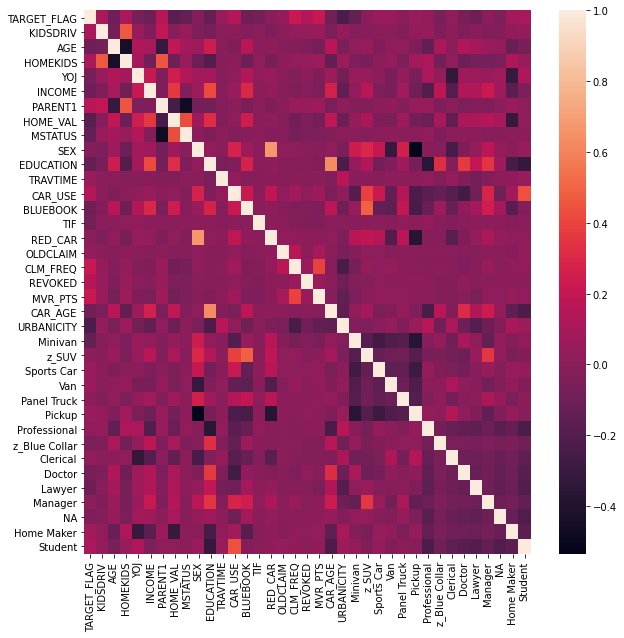

In [490]:
# correlation
corr = train_df.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns_plot = sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        ax = ax
       )

From the figure we notice that we don't have a strong correlation between features <br>
next step we will keep the features that has a correlation greater than 0.1

In [491]:
corr_with_target = corr[['TARGET_FLAG']]
corr_with_target["TARGET_FLAG"] = abs(corr_with_target["TARGET_FLAG"]).to_list()

/home/alpha10x/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [492]:
selected_features = corr_with_target[corr_with_target.TARGET_FLAG>0.1].index

In [493]:
selected_features

Index(['TARGET_FLAG', 'KIDSDRIV', 'AGE', 'HOMEKIDS', 'PARENT1', 'HOME_VAL',
       'MSTATUS', 'EDUCATION', 'CAR_USE', 'BLUEBOOK', 'CLM_FREQ', 'REVOKED',
       'MVR_PTS', 'URBANICITY', 'Minivan', 'Lawyer', 'Student'],
      dtype='object')

<hr style="border-width:2px;border-color:#BF3FAE">
<h3 style = "text-align:center"> 2. Model  </h3> 
<hr style="border-width:2px;border-color:#BF3FAE">

<hr style="border-width:2px;border-color:#BF3FAE">
<h4 style = "text-align:center"> 2.1. Model choice</h4> 
<hr style="border-width:2px;border-color:#BF3FAE">

In [494]:
# define train/test data

X = train_df[selected_features].drop('TARGET_FLAG',axis=1)
y = train_df.TARGET_FLAG
# we used stratify to keep the same distribution for the target in train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

/home/alpha10x/miniconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


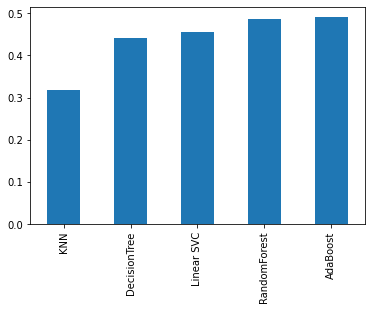

In [495]:
# fast trials to choose the best model in our case

def lets_try(train,labels):
    results={}
    def test_model(clf):
        clf.fit(X_train, y_train)

        f1_s = f1_score(y_test, clf.predict(X_test))
        scores=[f1_s]
        return scores
    
    clf = RandomForestClassifier(random_state=0)
    results["RandomForest"]=test_model(clf)
    
    clf = DecisionTreeClassifier()
    results["DecisionTree"]=test_model(clf)
    
    clf = LinearSVC()
    results["Linear SVC"]=test_model(clf)
    
    
    clf = AdaBoostClassifier()
    results["AdaBoost"]=test_model(clf)
    
    clf =  KNeighborsClassifier()
    results["KNN"]=test_model(clf)
    
    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["f1_score"] 
#     results['f1_score'].astype('float')
    return results
results = lets_try(X,y)
results=results.sort_values(by=["f1_score"],ascending=True)
results['f1_score'].plot(kind='bar')

In [496]:
results

,f1_score
KNN,0.318841
DecisionTree,0.441617
Linear SVC,0.455605
RandomForest,0.487057
AdaBoost,0.490530


it seems that the AdaBoost model is the best choice in this case

<hr style="border-width:2px;border-color:#BF3FAE">
<h4 style = "text-align:center"> 2.2. Hyperparameter optimization</h4> 
<hr style="border-width:2px;border-color:#BF3FAE">

In [497]:

scores=[]
space={
       'learning_rate':hp.uniform('learning_rate',0,2),
        'n_estimators': hp.uniform('n_estimators', 50,1000),
    }

def hyperparameter_tuning(space):
    clf = AdaBoostClassifier(learning_rate=space['learning_rate'],
                             n_estimators=int(space['n_estimators']),random_state=42)
    clf.fit(X_train, y_train)
    f1_s = f1_score(y_test, clf.predict(X_test))

    scores.append(f1_s)
    return {'loss':-f1_s, 'status': STATUS_OK }

In [498]:

trials_ = Trials()
best = fmin(fn=hyperparameter_tuning,
            space=space,
            algo=tpe.suggest,
            max_evals=40,
            trials=trials_)
print (best)

100%|██████████| 40/40 [01:12<00:00,  1.81s/trial, best loss: -0.5063985374771481]
{'learning_rate': 1.7346956790838133, 'n_estimators': 68.20773639997974}


<hr style="border-width:2px;border-color:#BF3FAE">
<h4 style = "text-align:center"> 2.3. Model evaluation</h4> 
<hr style="border-width:2px;border-color:#BF3FAE">

In [499]:
clf_best = AdaBoostClassifier(learning_rate=best['learning_rate'],
                             n_estimators=int(best['n_estimators']),random_state=42)
clf_best.fit(X_train, y_train)
y_pred = clf_best.predict(X_test)
f1_s = f1_score(y_test, clf_best.predict(X_test))
print(f"the f1_score :  {round(f1_s,2)}")

the f1_score :  0.51


In [500]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1803
           1       0.62      0.43      0.51       646

    accuracy                           0.78      2449
   macro avg       0.72      0.67      0.68      2449
weighted avg       0.76      0.78      0.77      2449



From the classification report we can see that we have a low f1-score for the class 1 which the minor class. <br>
One way to improve the result is to balance the training data using SMOTE method which will generate synthetic data for the minor class which 1.<br>
PS. We will just balance the training data without affecting our test data, so our test data will remain unbalanced

In [501]:
X_train_, y_train_ = SMOTE(random_state=16,k_neighbors=5, sampling_strategy='auto').fit_sample(X_train, y_train)


In [502]:
clf_best = AdaBoostClassifier(learning_rate=best['learning_rate'],
                             n_estimators=int(best['n_estimators']),random_state=42)
clf_best.fit(X_train_, y_train_)
f1_s = f1_score(y_test, clf_best.predict(X_test))
print(f"the f1_score :  {round(f1_s,2)}")

the f1_score :  0.55


In [503]:
print(classification_report(y_test, clf_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1803
           1       0.52      0.58      0.55       646

    accuracy                           0.75      2449
   macro avg       0.68      0.69      0.69      2449
weighted avg       0.76      0.75      0.75      2449



The smote method in this case doesn't help a lot, it increase the f1-score for the class 1 but decrease the f1-score for the class 0.

<hr style="border-width:2px;border-color:#BF3FAE">
<h3 style = "text-align:center"> Apply the model to the test data </h3> 
<hr style="border-width:2px;border-color:#BF3FAE">

In [513]:
# apply model to the test data and generate the csv file for predictions
prediction = test_df[['INDEX', 'TARGET_FLAG']]
prediction['TARGET_FLAG'] = clf_best.predict(test_df[selected_features].drop('TARGET_FLAG',axis=1))
# save the csv file for predicition
prediction.to_csv('output/auto_prediciton.csv', index=False)

/home/alpha10x/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<hr style="border-width:2px;border-color:#BF3FAE">
<h3 style = "text-align:center"> Future work </h3> 
<hr style="border-width:2px;border-color:#BF3FAE">

<li>To improve the model performance we should find more useful feature because most of them are uncorrelated with the target, so they don't help a lot for the prediction. <br>
<li>We can also combine different model instead of using just one model .